In [2]:
# Импорт библиотек для работы с данными
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
import warnings
warnings.filterwarnings("ignore")


# Предобработка данных.

#Нормализуем данные

У нас в основном количественные признаки, поэтому можно применить нормализацию (приведение в диапазон от 0 до 1) или стандартизацию (приведение к матожиданию 0, стандартному отклонению 1). Т.к. это в том числе учебная работа, то используем и нормализацию, и стандартизацию.

Этап предобработки данных нужен нам и для введенных данных в будущем приложении, которое явится результатом нашей работы.

<AxesSubplot:ylabel='Density'>

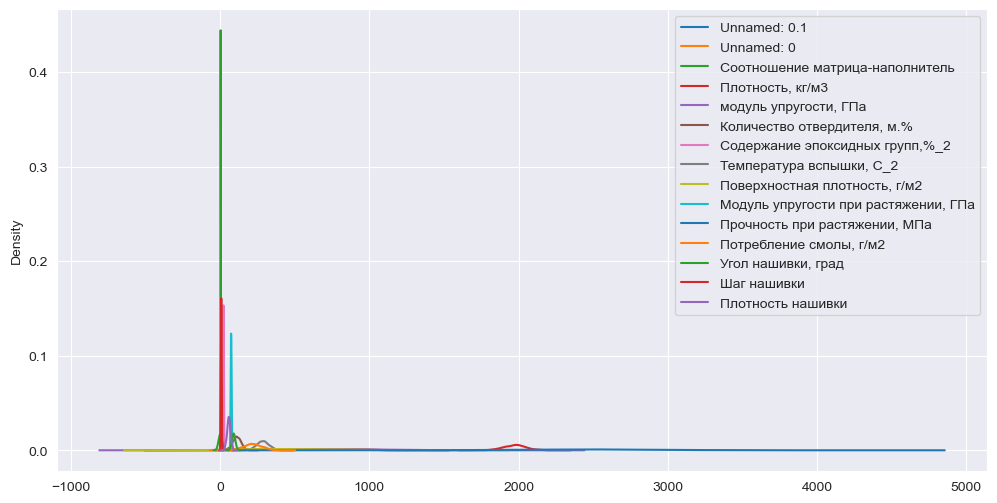

In [87]:
# На данный момент в нашем датасете всего 922 строки. Они все без выбросов, пропущенных значений, все имеют int или float. 
fig, ax = plt.subplots(figsize = (12, 6))
df_norm.plot(kind = 'kde', ax = ax)
# Оценка плотности ядра показывает, что наши данные находятся в разных диапазонах. А в связи с тем, что диапазоны очень разные, данные нужно нормализовать. Можем приступать к нормализации да

In [88]:
#Нормализуем данные с помощью MinMaxScaler() 
scaler = preprocessing.MinMaxScaler()
col = df.columns
result = scaler.fit_transform(df)

df_minmax_n = pd.DataFrame(result, columns = col)
df_minmax_n.describe()

,Unnamed: 0.1,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000
mean,0.506996,0.506996,0.499412,0.502904,0.451341,0.506200,0.490578,0.516739,0.373295,0.487343,0.503776,0.507876,0.510846,0.503426,0.503938
std,0.291686,0.291686,0.187858,0.188395,0.201534,0.186876,0.180548,0.190721,0.217269,0.196366,0.188668,0.199418,0.500154,0.183587,0.193933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251959,0.251959,0.371909,0.368184,0.305188,0.378514,0.366571,0.386228,0.204335,0.353512,0.373447,0.374647,0.000000,0.372844,0.376869
50%,0.517140,0.517140,0.495189,0.511396,0.451377,0.506382,0.488852,0.516931,0.354161,0.483718,0.501481,0.510143,1.000000,0.506414,0.504310
75%,0.760774,0.760774,0.629774,0.624719,0.587193,0.638735,0.623046,0.646553,0.538397,0.617568,0.624299,0.642511,1.000000,0.626112,0.630842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


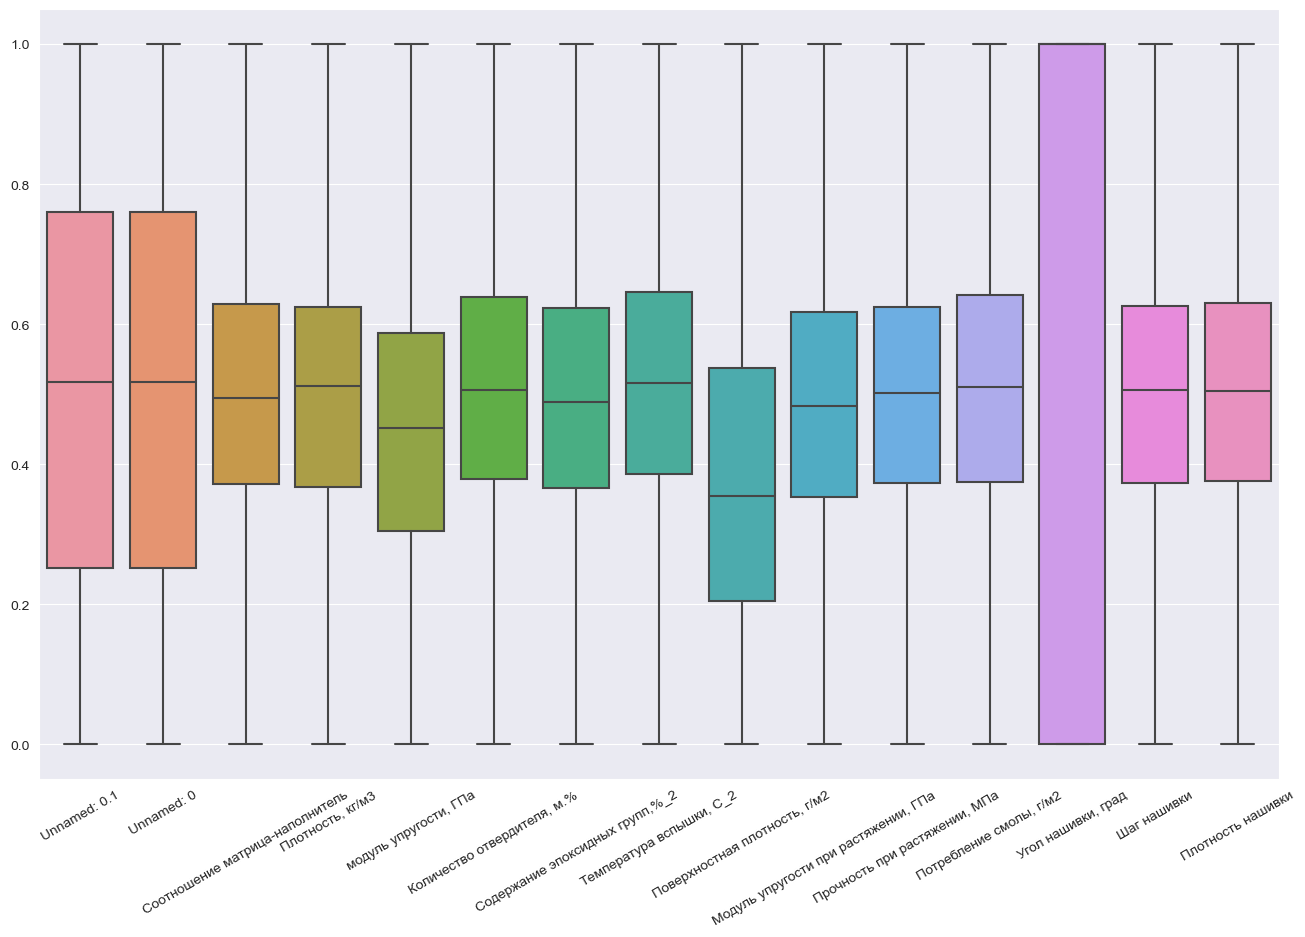

In [89]:
plt.figure(figsize = (16,10))
ax = sns.boxplot(data = df_minmax_n)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

<AxesSubplot:ylabel='Density'>

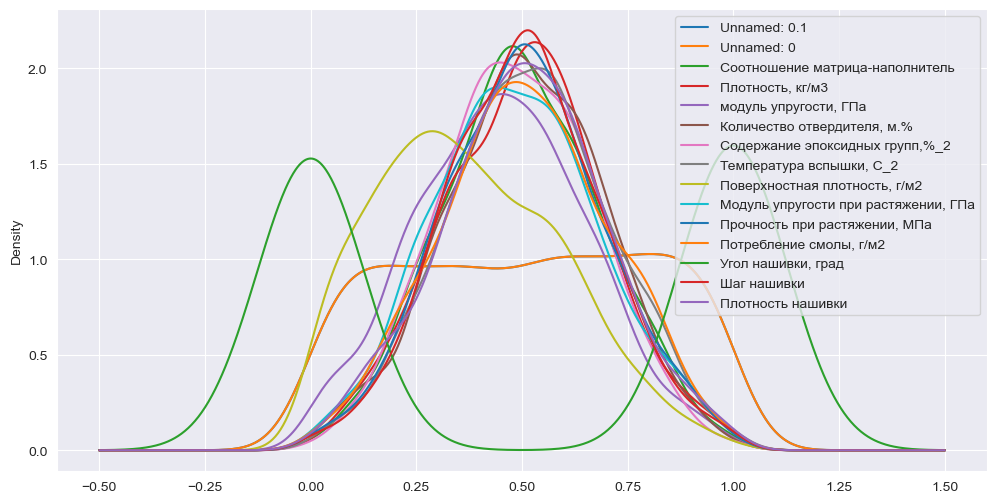

In [90]:
fig, ax = plt.subplots(figsize = (12, 6))
df_minmax_n.plot(kind = 'kde', ax = ax)

In [70]:
sns.pairplot(df_minmax_n, hue = 'Угол нашивки', markers = ["o", "s"], diag_kind = 'auto', palette = 'YlGn')

NameError: name 'df_minmax_n' is not defined

In [71]:
mask = np.triu(df_minmax_n.corr())
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(df_minmax_n.corr(), mask = mask, annot = True, square = True, cmap = 'Greens_r')
plt.xticks(rotation = 45, ha = 'right')
plt.show()


NameError: name 'df_minmax_n' is not defined

In [72]:
#Нормализуем данные с помощью Normalizer()

normalizer = Normalizer()
res = normalizer.fit_transform(df)
df_norm_n = pd.DataFrame(res, columns = df.columns)
df_norm_n

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,0.000000,0.000500,0.546880,0.199015,0.008082,0.005999,0.026940,0.056574,0.018858,0.808197,0.059268,0.000000,0.001078,0.015356
1,0.000269,0.000499,0.545436,0.198490,0.013434,0.006381,0.076473,0.056424,0.018808,0.806064,0.059111,0.000000,0.001075,0.016121
2,0.000537,0.000499,0.545401,0.198477,0.013407,0.008866,0.076468,0.056421,0.018807,0.806011,0.059107,0.000000,0.001075,0.018807
3,0.000805,0.000499,0.545011,0.198335,0.034634,0.005705,0.080543,0.056380,0.018793,0.805435,0.059065,0.000000,0.001342,0.012618
4,0.001074,0.000744,0.544829,0.202097,0.030022,0.005976,0.076388,0.056362,0.018787,0.805166,0.059046,0.000000,0.001342,0.015298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.299413,0.000668,0.574145,0.268488,0.025586,0.005919,0.095522,0.061529,0.021497,0.702147,0.036767,0.000294,0.002670,0.013829
1019,0.303916,0.001027,0.611437,0.132641,0.043539,0.005846,0.075820,0.104584,0.021749,0.703985,0.035113,0.000298,0.003151,0.016031
1020,0.284168,0.000914,0.549496,0.116129,0.030794,0.006674,0.069210,0.206201,0.020821,0.741876,0.065918,0.000279,0.001159,0.018841
1021,0.311960,0.001132,0.631497,0.226553,0.043203,0.005881,0.084263,0.195996,0.022623,0.632999,0.060231,0.000306,0.001929,0.017801


<AxesSubplot:ylabel='Density'>

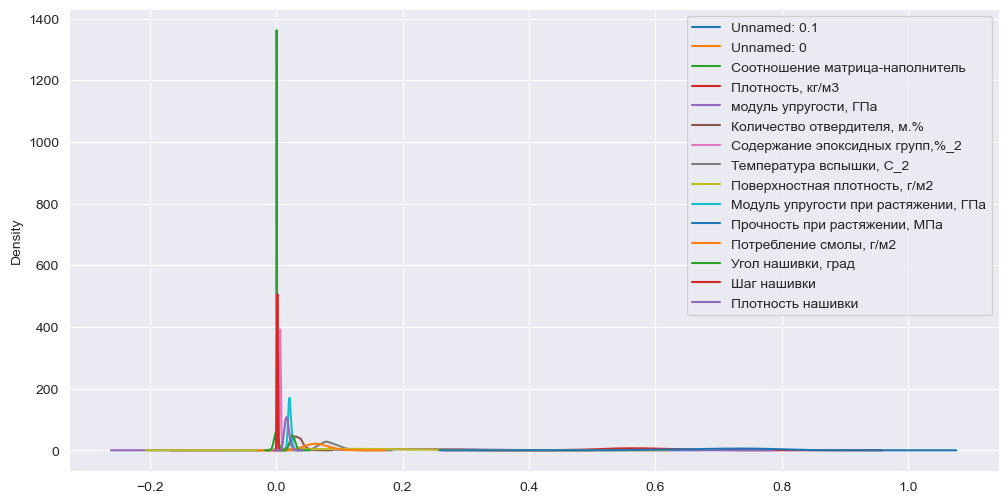

In [93]:
fig, ax = plt.subplots(figsize = (12, 6))
df_norm_n.plot(kind = 'kde', ax = ax)

In [94]:
#Сравним с данными до нормализации
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
3,3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
5,5,5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
6,6,6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0
7,7,7,2.561475,1900.0,535.000000,111.86,22.267857,284.615385,380.0,75.0,1800.0,120.0,0,7.0,47.0
8,8,8,3.557018,1930.0,889.000000,129.00,21.250000,300.000000,380.0,75.0,1800.0,120.0,0,7.0,57.0
9,9,9,3.532338,2100.0,1421.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,0,7.0,60.0
10,10,10,2.919678,2160.0,933.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,0,7.0,70.0
11,11,11,2.877358,1990.0,1628.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,0,9.0,47.0


In [95]:
# Проверяем перевод данных из нормализованных в исходные
col = df_minmax_n.columns
result_reverse = scaler.inverse_transform(df_minmax_n)
initial_data = pd.DataFrame(result_reverse, columns = col)
initial_data.head(10)

,Unnamed: 0.1,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.0,1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
1,3.0,3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
2,4.0,4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0
3,5.0,5.0,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,60.0
4,6.0,6.0,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,70.0
5,7.0,7.0,2.561475,1900.0,535.000000,111.86,22.267857,284.615385,380.0,75.0,1800.0,120.0,0.0,7.0,47.0
6,8.0,8.0,3.557018,1930.0,889.000000,129.00,21.250000,300.000000,380.0,75.0,1800.0,120.0,0.0,7.0,57.0
7,9.0,9.0,3.532338,2100.0,1421.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,0.0,7.0,60.0
8,10.0,10.0,2.919678,2160.0,933.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,0.0,7.0,70.0
9,11.0,11.0,2.877358,1990.0,1628.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,0.0,9.0,47.0


In [96]:
#Рассмотрим несколько вариантов корреляции между параметрами после нормализации (первый вариант)
df_norm_n[df_norm_n.columns].corr()

,Unnamed: 0.1,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Unnamed: 0.1,1.000000,1.000000,-0.076600,-0.125416,-0.118326,-0.032215,-0.056758,-0.075676,-0.036008,-0.100957,-0.329929,-0.030384,0.787977,-0.006591,0.013975
Unnamed: 0,1.000000,1.000000,-0.076600,-0.125416,-0.118326,-0.032215,-0.056758,-0.075676,-0.036008,-0.100957,-0.329929,-0.030384,0.787977,-0.006591,0.013975
Соотношение матрица-наполнитель,-0.076600,-0.076600,1.000000,0.286603,0.043184,0.136638,0.224703,0.182338,0.027267,0.268294,-0.218102,0.161185,-0.085193,0.137293,0.172459
"Плотность, кг/м3",-0.125416,-0.125416,0.286603,1.000000,-0.018568,0.383670,0.649962,0.557947,0.078432,0.871258,-0.740473,0.309685,-0.141362,0.280553,0.417868
"модуль упругости, ГПа",-0.118326,-0.118326,0.043184,-0.018568,1.000000,0.057953,-0.014009,0.019374,-0.017766,-0.005299,-0.320848,-0.002189,-0.086205,0.009594,0.053697
"Количество отвердителя, м.%",-0.032215,-0.032215,0.136638,0.383670,0.057953,1.000000,0.297431,0.304919,0.072285,0.370894,-0.344458,0.136533,-0.025160,0.116659,0.190526
"Содержание эпоксидных групп,%_2",-0.056758,-0.056758,0.224703,0.649962,-0.014009,0.297431,1.000000,0.396127,0.030824,0.651530,-0.490310,0.238527,-0.059282,0.227166,0.256367
"Температура вспышки, С_2",-0.075676,-0.075676,0.182338,0.557947,0.019374,0.304919,0.396127,1.000000,0.044686,0.556390,-0.452281,0.241832,-0.075897,0.208749,0.241589
"Поверхностная плотность, г/м2",-0.036008,-0.036008,0.027267,0.078432,-0.017766,0.072285,0.030824,0.044686,1.000000,0.065156,-0.285233,0.006374,0.008456,0.069282,-0.017106
"Модуль упругости при растяжении, ГПа",-0.100957,-0.100957,0.268294,0.871258,-0.005299,0.370894,0.651530,0.556390,0.065156,1.000000,-0.659521,0.325471,-0.105364,0.291168,0.388565


In [97]:
#Рассмотрим второй вариант корреляции между параметрами после нормализации (второй вариант)
df_minmax_n[df_minmax_n.columns].corr()

,Unnamed: 0.1,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Unnamed: 0.1,1.000000,1.000000,-0.024374,-0.039229,-0.054259,0.017996,0.029789,-0.003255,0.024305,0.025623,0.041208,0.021012,0.799537,0.016178,0.067496
Unnamed: 0,1.000000,1.000000,-0.024374,-0.039229,-0.054259,0.017996,0.029789,-0.003255,0.024305,0.025623,0.041208,0.021012,0.799537,0.016178,0.067496
Соотношение матрица-наполнитель,-0.024374,-0.024374,1.000000,0.007996,0.051643,0.001353,0.021982,-0.010565,0.011910,-0.024316,0.019141,0.076857,-0.032144,0.039924,0.047835
"Плотность, кг/м3",-0.039229,-0.039229,0.007996,1.000000,-0.001416,-0.048938,0.004568,-0.021256,0.061496,-0.015597,-0.079188,-0.009609,-0.052993,-0.048648,0.086460
"модуль упругости, ГПа",-0.054259,-0.054259,0.051643,-0.001416,1.000000,0.044550,-0.001442,0.037622,-0.007805,0.020063,0.031041,0.008368,-0.031490,0.010238,0.078810
"Количество отвердителя, м.%",0.017996,0.017996,0.001353,-0.048938,0.044550,1.000000,0.011429,0.070623,0.038762,-0.057026,-0.065711,-0.014827,0.034103,-0.017394,0.007981
"Содержание эпоксидных групп,%_2",0.029789,0.029789,0.021982,0.004568,-0.001442,0.011429,1.000000,-0.025315,-0.015844,0.053887,-0.013099,0.010808,0.034520,0.007571,-0.034481
"Температура вспышки, С_2",-0.003255,-0.003255,-0.010565,-0.021256,0.037622,0.070623,-0.025315,1.000000,0.020307,0.014168,-0.017263,0.048142,0.002371,0.034395,-0.015014
"Поверхностная плотность, г/м2",0.024305,0.024305,0.011910,0.061496,-0.007805,0.038762,-0.015844,0.020307,1.000000,0.033526,-0.027320,-0.012606,0.053180,0.036931,-0.034989
"Модуль упругости при растяжении, ГПа",0.025623,0.025623,-0.024316,-0.015597,0.020063,-0.057026,0.053887,0.014168,0.033526,1.000000,-0.002393,0.051676,0.031910,-0.010193,0.012488


In [98]:
df_minmax_n


,Unnamed: 0.1,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.000000,0.000000,0.274768,0.651097,0.452951,0.079153,0.607435,0.509164,0.162230,0.272962,0.727777,0.514688,0.0,0.289334,0.546433
1,0.001959,0.001959,0.274768,0.651097,0.452951,0.630983,0.418887,0.583596,0.162230,0.272962,0.727777,0.514688,0.0,0.362355,0.319758
2,0.002938,0.002938,0.466552,0.651097,0.461725,0.511257,0.495653,0.509164,0.162230,0.272962,0.727777,0.514688,0.0,0.362355,0.494123
3,0.003918,0.003918,0.465836,0.571539,0.458649,0.511257,0.495653,0.509164,0.162230,0.272962,0.727777,0.514688,0.0,0.362355,0.546433
4,0.004897,0.004897,0.424236,0.332865,0.494944,0.511257,0.495653,0.509164,0.162230,0.272962,0.727777,0.514688,0.0,0.362355,0.720799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,0.996082,0.996082,0.361662,0.444480,0.560064,0.337550,0.333908,0.703458,0.161609,0.473553,0.472912,0.183151,1.0,0.660014,0.320103
918,0.997062,0.997062,0.607674,0.704373,0.272088,0.749605,0.294428,0.362087,0.271207,0.462512,0.461722,0.157752,1.0,0.768759,0.437468
919,0.998041,0.998041,0.573391,0.498274,0.254927,0.501991,0.623085,0.334063,0.572959,0.580201,0.587558,0.572648,1.0,0.301102,0.679468
920,0.999021,0.999021,0.662497,0.748688,0.454635,0.717585,0.267818,0.466417,0.496511,0.535317,0.341643,0.434855,1.0,0.458245,0.516112


In [99]:
df_norm_n

,Unnamed: 0.1,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.000269,0.000269,0.000499,0.545436,0.198490,0.013434,0.006381,0.076473,0.056424,0.018808,0.806064,0.059111,0.000000,0.001075,0.016121
1,0.000805,0.000805,0.000499,0.545011,0.198335,0.034634,0.005705,0.080543,0.056380,0.018793,0.805434,0.059065,0.000000,0.001342,0.012618
2,0.001074,0.001074,0.000744,0.544829,0.202097,0.030022,0.005976,0.076388,0.056362,0.018787,0.805166,0.059045,0.000000,0.001342,0.015298
3,0.001348,0.001348,0.000746,0.539270,0.201687,0.030161,0.006004,0.076742,0.056623,0.018874,0.808905,0.059320,0.000000,0.001348,0.016178
4,0.001633,0.001633,0.000699,0.519918,0.219672,0.030449,0.006061,0.077475,0.057164,0.019055,0.816625,0.059886,0.000000,0.001361,0.019055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,0.286740,0.286740,0.000640,0.549844,0.257124,0.024503,0.005668,0.091479,0.058925,0.020587,0.672427,0.035211,0.025350,0.002557,0.013244
918,0.290688,0.290688,0.000982,0.584824,0.126868,0.041644,0.005591,0.072519,0.100032,0.020802,0.673343,0.033585,0.025674,0.003014,0.015333
919,0.273266,0.273266,0.000879,0.528415,0.111674,0.029613,0.006418,0.066555,0.198290,0.020022,0.713414,0.063389,0.024112,0.001115,0.018119
920,0.297703,0.297703,0.001080,0.602637,0.216199,0.041229,0.005612,0.080412,0.187039,0.021589,0.604070,0.057478,0.026242,0.001841,0.016988


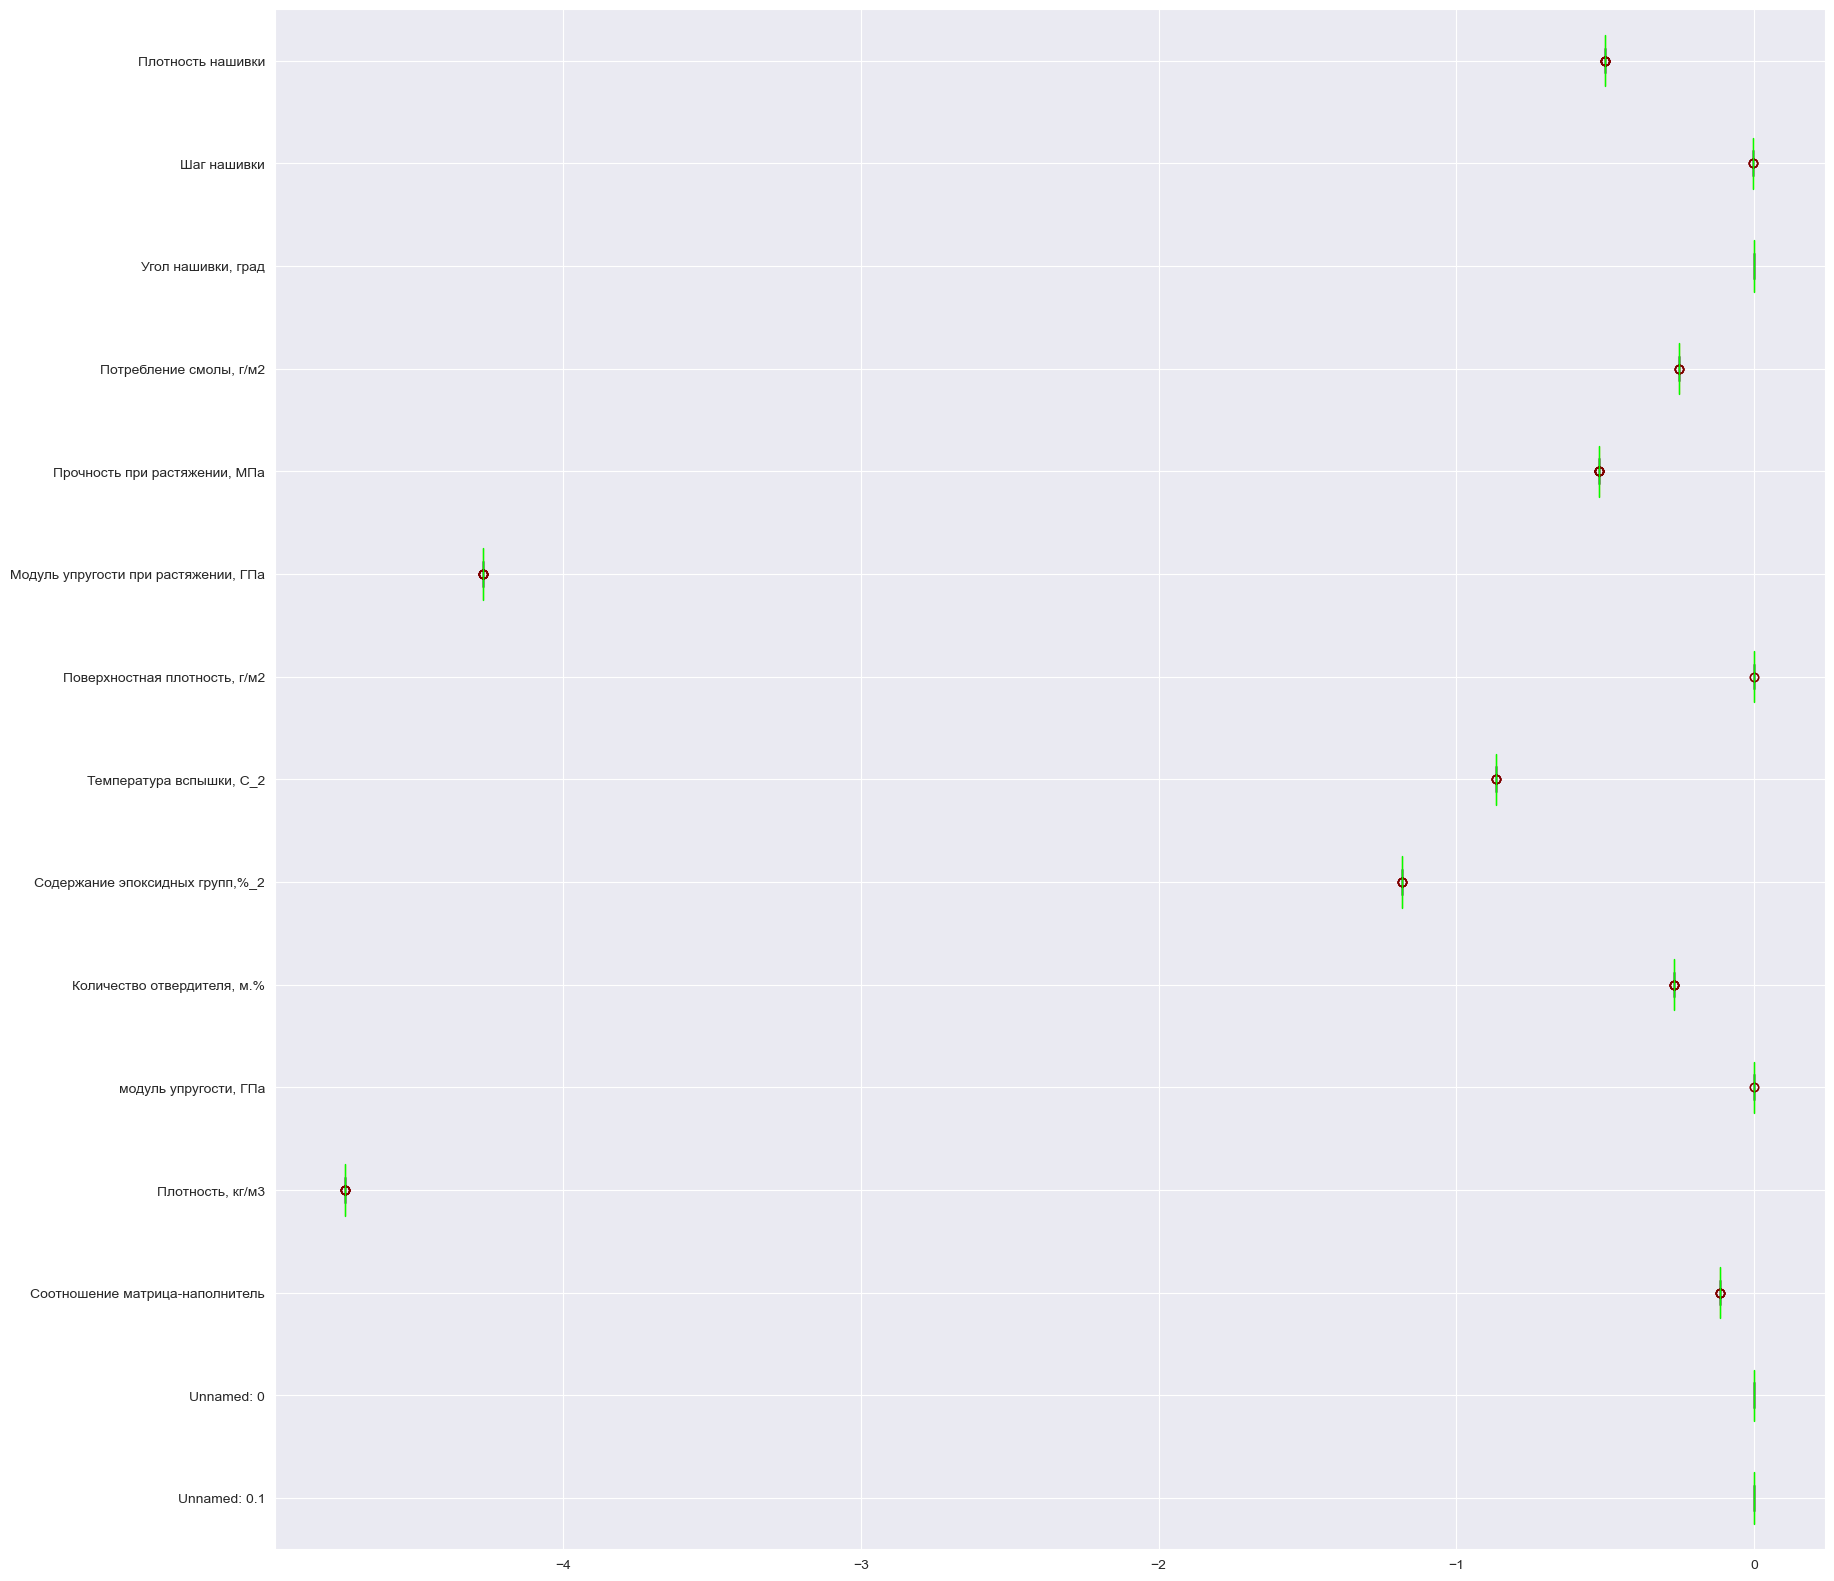

In [100]:
#Построим на "ящики с усами"
scaler = MinMaxScaler()
scaler.fit(df)
plt.figure(figsize=(20, 20))
#Выводим "ящики"
plt.boxplot(pd.DataFrame(scaler.transform(df_norm_n)), labels = df_norm_n.columns, patch_artist = True, meanline = True, vert = False, boxprops = dict(facecolor = 'g', color = 'y'),medianprops = dict(color = 'lime'), whiskerprops = dict(color = "g"), capprops = dict(color="black"), flierprops = dict(color = "y", markeredgecolor = "maroon"))
plt.show()

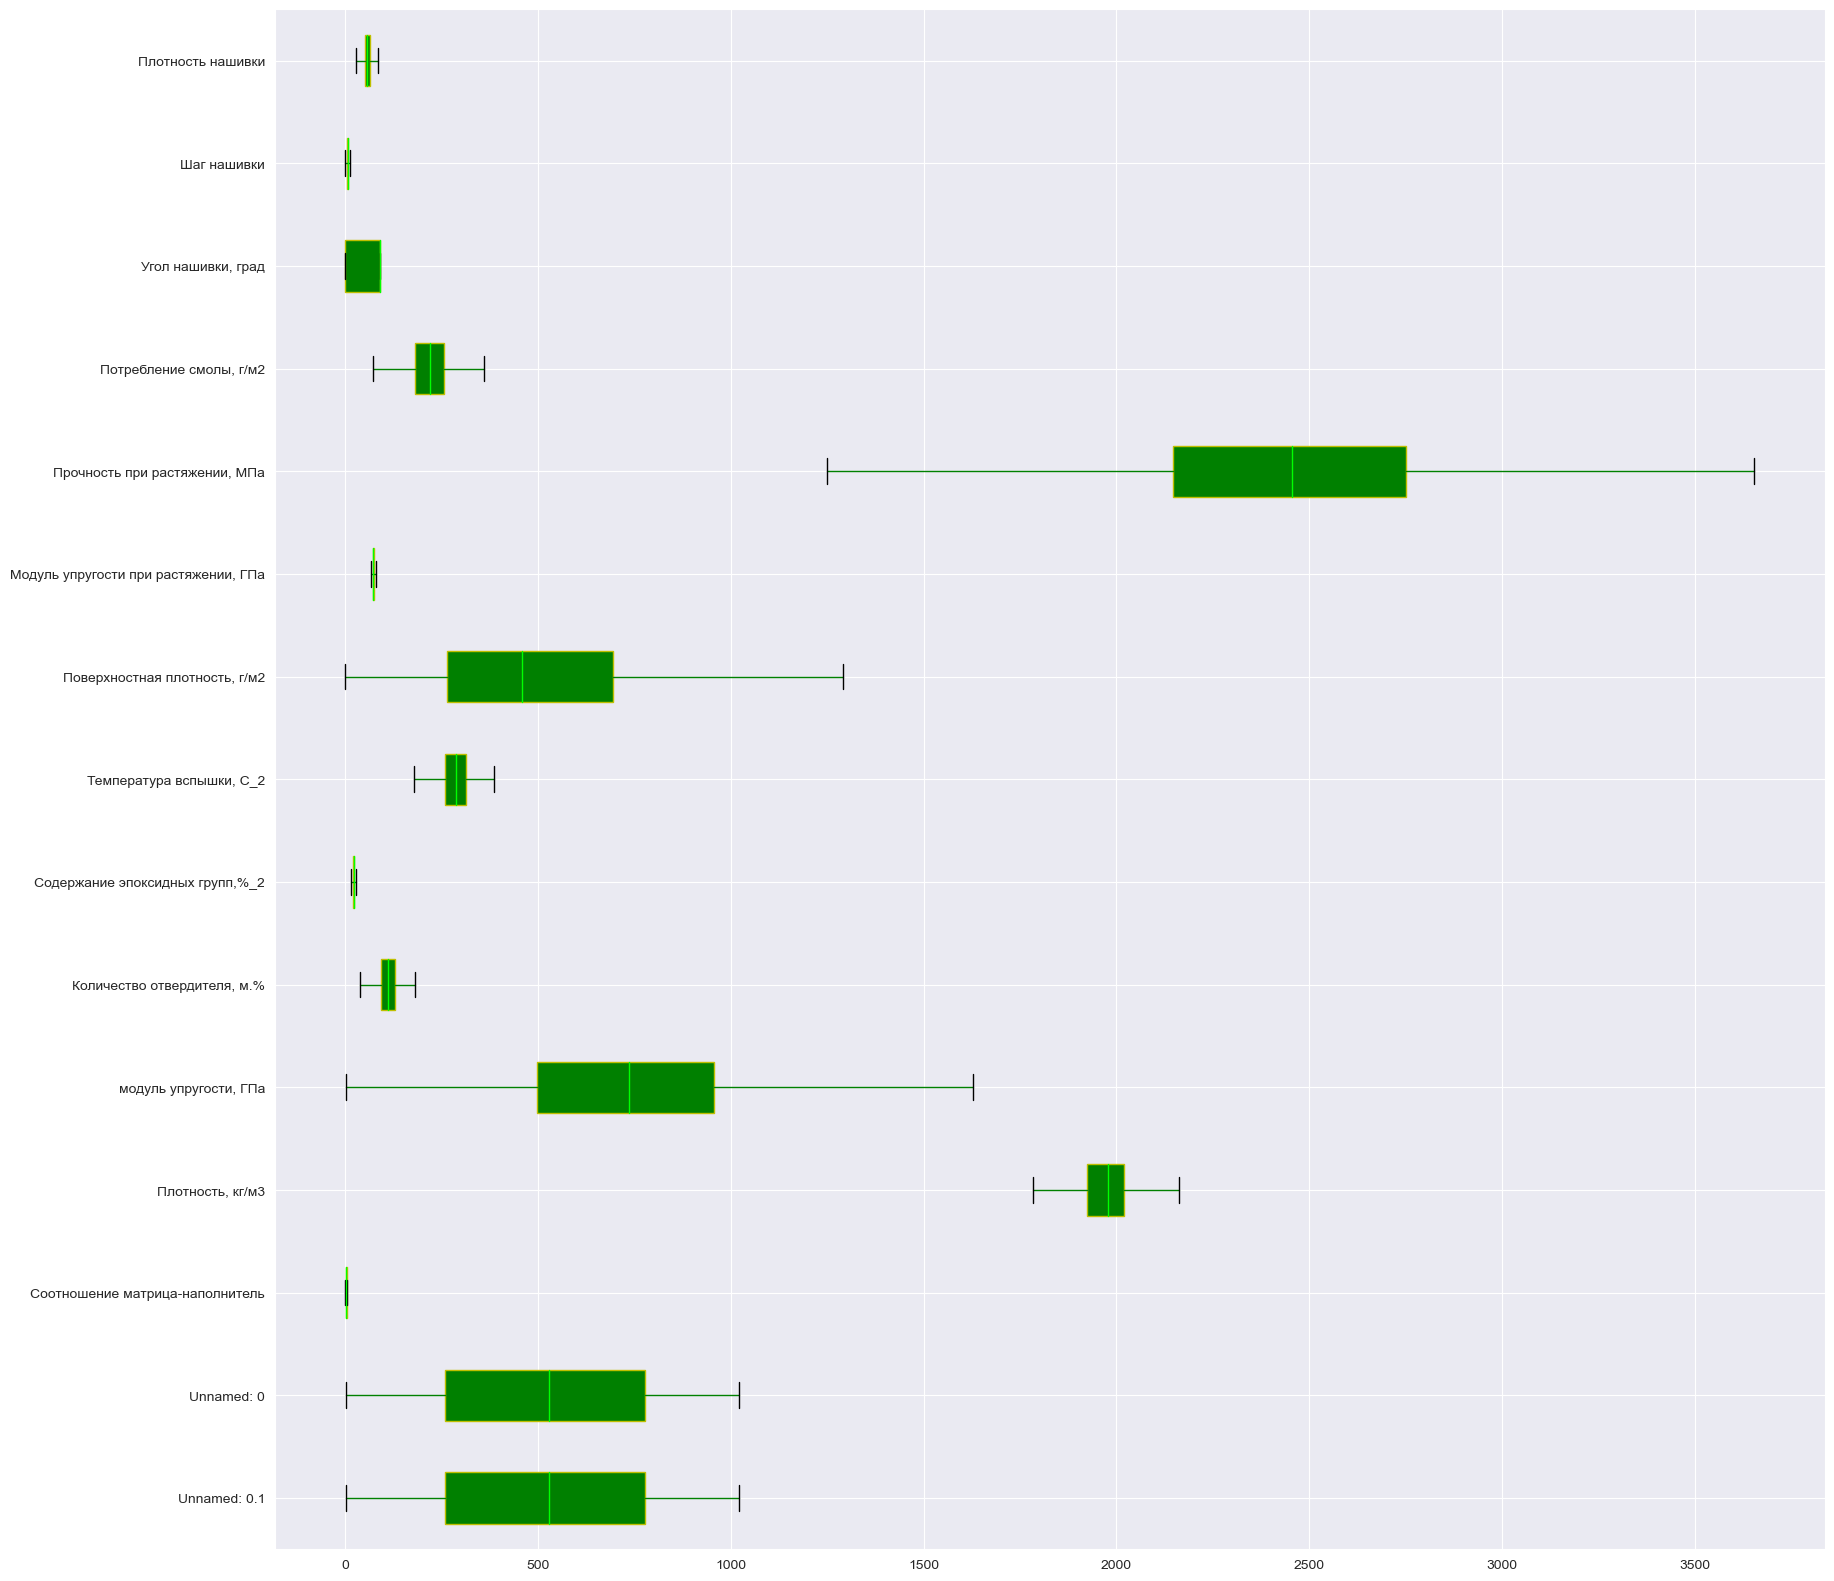

In [101]:
#Попытаемся посмотреть на "ящики с усами"
scaler = MinMaxScaler()
scaler.fit(df_minmax_n)
plt.figure(figsize = (20, 20))
#Выводим "ящики"
plt.boxplot(pd.DataFrame(scaler.transform(df)), labels = df_minmax_n.columns, patch_artist = True, meanline = True, vert = False, boxprops = dict(facecolor = 'g', color = 'y'),medianprops = dict(color = 'lime'), whiskerprops = dict(color = "g"), capprops = dict(color = "black"), flierprops = dict(color = "y", markeredgecolor = "maroon"))
plt.show()

In [102]:
# Визуализация графиков показывает, что нормализация при помощи "Normalizer" дает нам большое количество выбросов

# Стандартизируем данные

In [104]:
X1 = df_minmax_n.copy()
X2 = df_norm_n.copy()

In [105]:
df_std_X1 = preprocessing.StandardScaler().fit(X1)
df_standart_X1 = df_std_X1.transform(X1)
df_standart_1 = pd.DataFrame(df_standart_X1)

<AxesSubplot:ylabel='Density'>

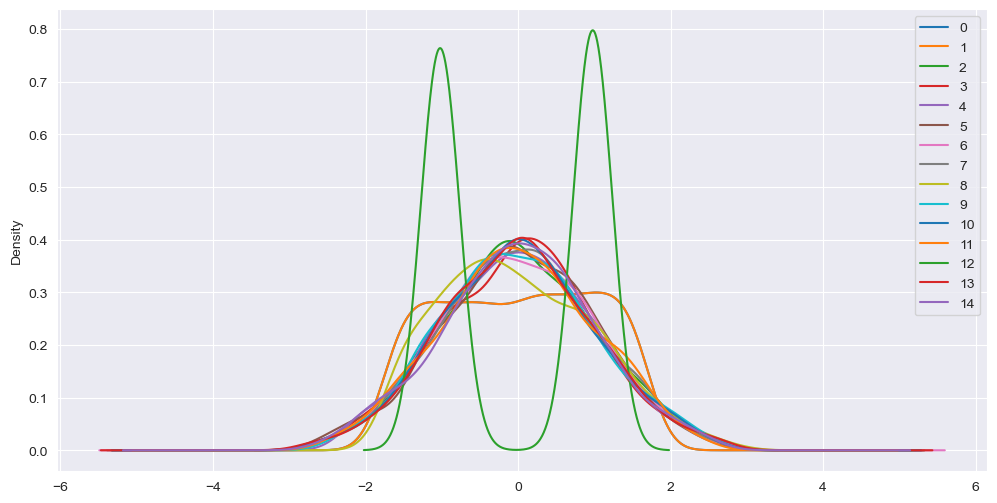

In [106]:
fig, ax = plt.subplots(figsize = (12, 6))
df_standart_1.plot(kind = 'kde', ax = ax)

In [107]:
df_standart_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.739099,-1.739099,-1.196467,0.787037,0.007992,-2.286425,0.647585,-0.039740,-0.971971,-1.092335,1.187925,0.034181,-1.021932,-1.166792,0.219240
1,-1.732380,-1.732380,-1.196467,0.787037,0.007992,0.668092,-0.397291,0.350738,-0.971971,-1.092335,1.187925,0.034181,-1.021932,-0.768833,-0.950227
2,-1.729020,-1.729020,-0.175012,0.787037,0.051553,0.027074,0.028123,-0.039740,-0.971971,-1.092335,1.187925,0.034181,-1.021932,-0.768833,-0.050637
3,-1.725661,-1.725661,-0.178825,0.364514,0.036283,0.027074,0.028123,-0.039740,-0.971971,-1.092335,1.187925,0.034181,-1.021932,-0.768833,0.219240
4,-1.722301,-1.722301,-0.400390,-0.903054,0.216474,0.027074,0.028123,-0.039740,-0.971971,-1.092335,1.187925,0.034181,-1.021932,-0.768833,1.118831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,1.677664,1.677664,-0.733662,-0.310284,0.539767,-0.902956,-0.868217,0.979545,-0.974830,-0.070267,-0.163679,-1.629244,0.978538,0.853400,-0.948449
918,1.681023,1.681023,0.576611,1.069974,-0.889924,1.303201,-1.087006,-0.811326,-0.470122,-0.126524,-0.223019,-1.756683,0.978538,1.446055,-0.342933
919,1.684383,1.684383,0.394018,-0.024589,-0.975122,-0.022536,0.734311,-0.958342,0.919470,0.473140,0.444312,0.324984,0.978538,-1.102660,0.905599
920,1.687742,1.687742,0.868603,1.305328,0.016356,1.131763,-1.234469,-0.263996,0.567419,0.244441,-0.859827,-0.366368,0.978538,-0.246233,0.062808


In [108]:
df_std_X2 = preprocessing.StandardScaler().fit(X2)
df_standart_X2 = df_std_X2.transform(X2)
df_standart_2 = pd.DataFrame(df_standart_X2)

<AxesSubplot:ylabel='Density'>

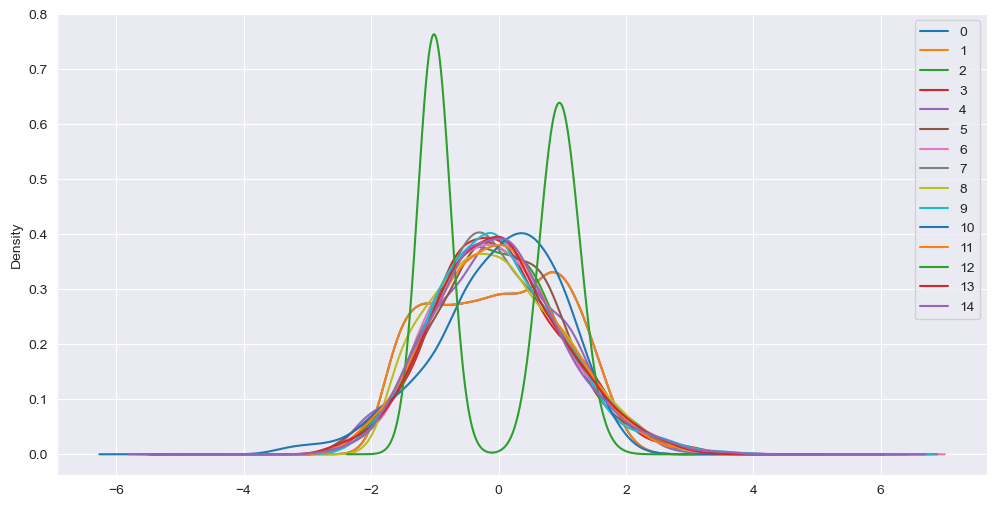

In [109]:
fig, ax = plt.subplots(figsize = (12, 6))
df_standart_2.plot(kind = 'kde', ax=ax)

In [110]:
df_standart_2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.771940,-1.771940,-1.295974,-0.536760,-0.161122,-2.215170,-0.130041,-0.512205,-1.031045,-1.130590,1.348686,-0.265662,-1.012012,-1.228113,-0.200830
1,-1.765568,-1.765568,-1.297382,-0.543663,-0.162780,0.233936,-0.825002,-0.230896,-1.031586,-1.136791,1.339938,-0.268243,-1.012012,-0.885829,-1.160488
2,-1.762385,-1.762385,-0.411564,-0.546609,-0.122521,-0.298847,-0.546188,-0.518092,-1.031816,-1.139436,1.336205,-0.269344,-1.012012,-0.886402,-0.426341
3,-1.759126,-1.759126,-0.402411,-0.636718,-0.126906,-0.282741,-0.517665,-0.493580,-1.028606,-1.102603,1.388172,-0.254014,-1.012012,-0.878432,-0.185264
4,-1.755741,-1.755741,-0.571688,-0.950396,0.065569,-0.249486,-0.458770,-0.442966,-1.021977,-1.026548,1.495478,-0.222360,-1.012012,-0.861977,0.602802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,1.628652,1.628652,-0.787380,-0.465324,0.466369,-0.936433,-0.863086,0.524820,-1.000373,-0.379335,-0.508797,-1.601986,0.934604,0.666947,-0.989103
918,1.675517,1.675517,0.450708,0.101674,-0.927608,1.043814,-0.942151,-0.785402,-0.496120,-0.288793,-0.496066,-1.692914,0.959470,1.252027,-0.416696
919,1.468717,1.468717,0.076546,-0.812663,-1.090210,-0.346111,-0.091937,-1.197603,0.709189,-0.618115,0.060904,-0.026495,0.839500,-1.176885,0.346360
920,1.758792,1.758792,0.804531,0.390405,0.028402,0.995852,-0.920733,-0.239994,0.571172,0.043656,-1.458933,-0.356989,1.003092,-0.248412,0.036554


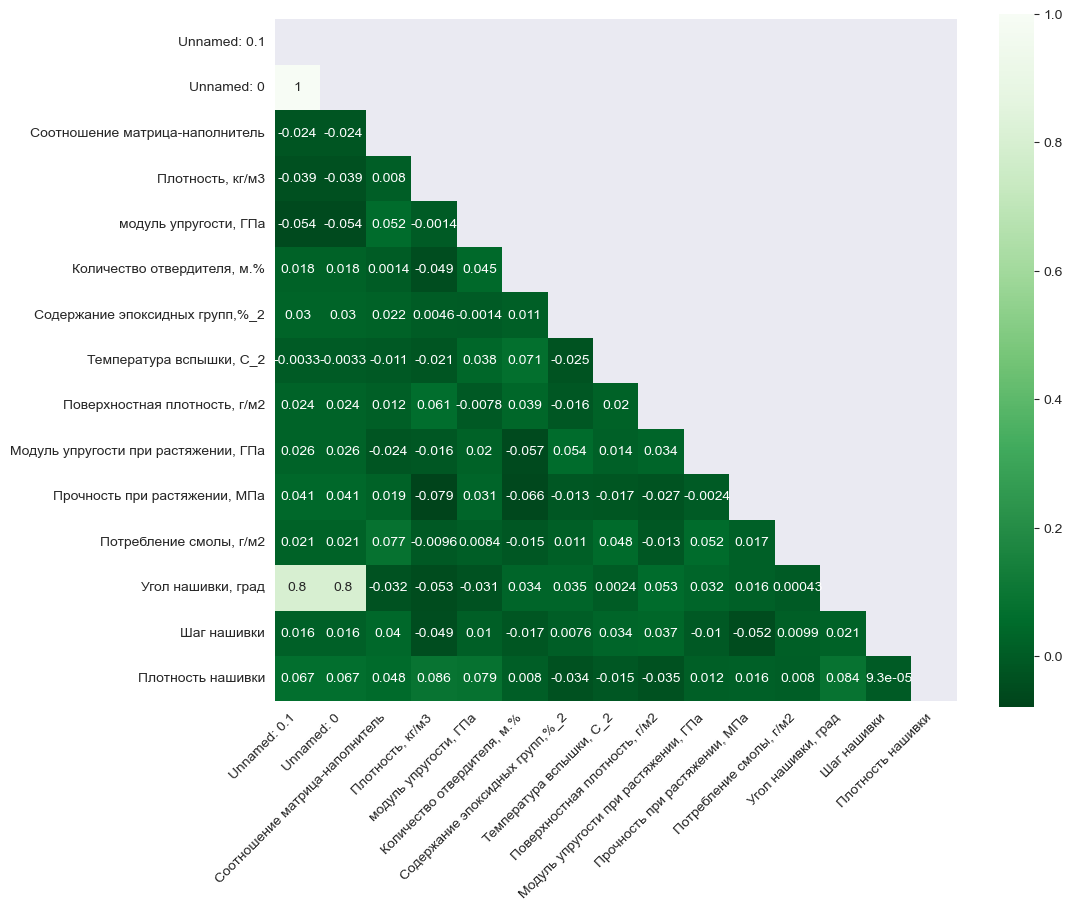

In [111]:
mask = np.triu(X1.corr())
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(X1.corr(), mask=mask, annot=True, square=True, cmap='Greens_r')
plt.xticks(rotation=45, ha='right')
plt.show()

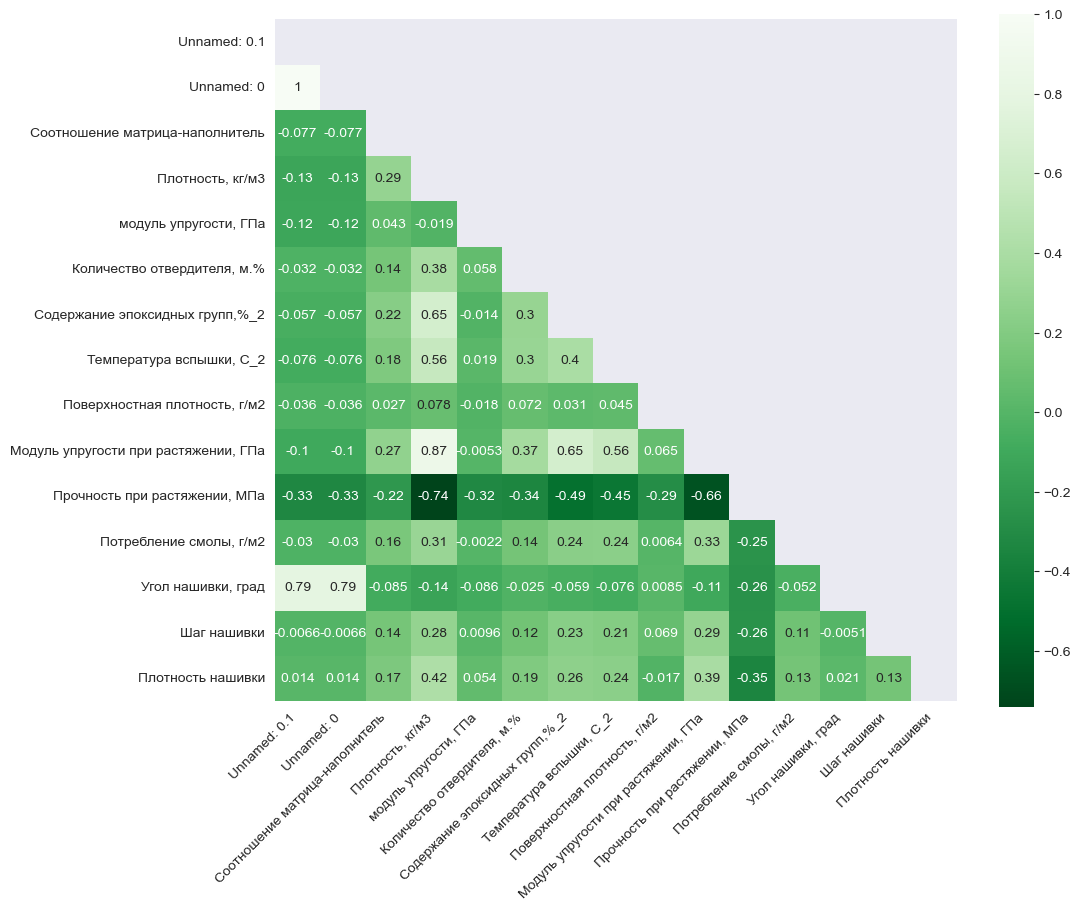

In [112]:
mask = np.triu(X2.corr())
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(X2.corr(), mask=mask, annot=True, square=True, cmap='Greens_r')
plt.xticks(rotation=45, ha='right')
plt.show()

In [113]:
df_norm_n.describe()

,Unnamed: 0.1,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000
mean,0.149540,0.149540,0.000858,0.578551,0.213545,0.032609,0.006508,0.083885,0.140476,0.021486,0.709033,0.063863,0.013179,0.002035,0.016854
std,0.084287,0.084287,0.000277,0.061727,0.093493,0.008661,0.000974,0.014478,0.081565,0.002370,0.071984,0.017895,0.013030,0.000782,0.003652
min,0.000269,0.000269,0.000160,0.437775,0.000693,0.011336,0.004084,0.048767,0.000229,0.015840,0.462857,0.021295,0.000000,0.000010,0.007082
25%,0.076323,0.076323,0.000663,0.534708,0.146204,0.026807,0.005804,0.073617,0.077365,0.019853,0.664399,0.051368,0.000000,0.001489,0.014361
50%,0.152116,0.152116,0.000847,0.574269,0.212838,0.032461,0.006459,0.082355,0.134952,0.021320,0.716747,0.063416,0.020950,0.002011,0.016742
75%,0.221627,0.221627,0.001034,0.618027,0.277408,0.038377,0.007132,0.093569,0.197177,0.023024,0.760919,0.075823,0.025641,0.002536,0.019106
max,0.333866,0.333866,0.001803,0.785583,0.524784,0.062766,0.010242,0.138595,0.413769,0.030382,0.871877,0.121425,0.035513,0.004515,0.029906


In [114]:
df_minmax_n.describe()

,Unnamed: 0.1,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000
mean,0.506996,0.506996,0.499412,0.502904,0.451341,0.506200,0.490578,0.516739,0.373295,0.487343,0.503776,0.507876,0.510846,0.503426,0.503938
std,0.291686,0.291686,0.187858,0.188395,0.201534,0.186876,0.180548,0.190721,0.217269,0.196366,0.188668,0.199418,0.500154,0.183587,0.193933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251959,0.251959,0.371909,0.368184,0.305188,0.378514,0.366571,0.386228,0.204335,0.353512,0.373447,0.374647,0.000000,0.372844,0.376869
50%,0.517140,0.517140,0.495189,0.511396,0.451377,0.506382,0.488852,0.516931,0.354161,0.483718,0.501481,0.510143,1.000000,0.506414,0.504310
75%,0.760774,0.760774,0.629774,0.624719,0.587193,0.638735,0.623046,0.646553,0.538397,0.617568,0.624299,0.642511,1.000000,0.626112,0.630842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Разработка и обучение нескольких моделей для прогноза прочности при растяжении

 '''Данные в нашем итоговом датасете в основном непрерывные и на ум приходит сразу решение данной задачи с использованием регрессионных моделей.
Но попарные графики рассеивания точек и тепловая карта не дают нам реальной взаимосвязи и возможности прямого прогнозирования, 
поэтому будем использовать и категориальные подходы к прогнозированию (например, попробуем метод ближайших соседей) 
или обучение со скрытыми слоями, чтобы выявить дополнительные взаимосвязи.

Задача ВКР на этом этапе звучит так: "При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.'''

 'Данные в нашем итоговом датасете в основном непрерывные и на ум приходит сразу решение данной задачи с использованием регрессионных моделей.\nНо попарные графики рассеивания точек и тепловая карта не дают нам реальной взаимосвязи и возможности прямого прогнозирования, \nпоэтому будем использовать и категориальные подходы к прогнозированию (например, попробуем метод ближайших соседей) \nили обучение со скрытыми слоями, чтобы выявить дополнительные взаимосвязи.\n\nЗадача ВКР на этом этапе звучит так: "При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.'
Сформируем выборки и посмотрим, что получилось

In [73]:
# Прогнозируем прочность при растяжении

После всех подготовительных работ переходим к процессу создания, обучения моделей. Мы будем использовать в Python библиотеку Scikit-Learn. В качестве базового уровня предскажем медианное значение цели на обучающем наборе для всех примеров в тестовом наборе. В качестве метрики возьмём среднюю абсолютную ошибку (mae) в прогнозах. Для обучения используем 70 % данных, а для тестирования — 30 %.

In [74]:
#разбиваем на тестовую, тренировочную выборки, выделяя предикторы и целевые переменные
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    df_norm_n.loc[:, df_norm_n.columns != 'Прочность при растяжении, МПа'],
    df[['Прочность при растяжении, МПа']],
       test_size = 0.3,
    random_state = 42)

In [75]:
# Проверка правильности разбивки
df_norm_n.shape[0] - x_train_1.shape[0] - x_test_1.shape[0]

0

In [76]:
x_train_1.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
604,0.245570,0.001455,0.757315,0.138915,0.030521,0.010553,0.127172,0.003678,0.029683,0.065263,0.000407,0.004173,0.029980
227,0.083378,0.001075,0.736859,0.349166,0.056810,0.008882,0.108405,0.260829,0.025423,0.052345,0.000000,0.002433,0.015924
970,0.288297,0.000678,0.578518,0.299715,0.045083,0.006915,0.087178,0.083826,0.021626,0.062721,0.000297,0.001343,0.014345
497,0.146251,0.000888,0.611868,0.330203,0.031071,0.007410,0.079025,0.086214,0.020657,0.049106,0.000000,0.000215,0.024723
919,0.298448,0.000659,0.636730,0.296967,0.038845,0.007575,0.073767,0.028011,0.023691,0.024689,0.000325,0.002151,0.021745


In [77]:
y_train_1

,"Прочность при растяжении, МПа"
604,1399.118555
227,1337.748317
970,2309.233746
497,2347.135204
919,1966.565850
...,...
106,3773.151949
270,1071.123751
860,2479.149745
435,1703.062546


In [78]:
y_test_1

,"Прочность при растяжении, МПа"
525,2572.155786
357,2414.507362
444,2219.142605
31,2796.785402
618,2734.030447
...,...
239,2249.948992
310,2748.405735
211,2188.744473
760,2325.464987


In [79]:
y_train_1.shape

(716, 1)

In [80]:
#Функция для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке
def mean_model(y_test_1):
    return [np.mean(y_test_1) for _ in range(len(y_test_1))]
y_1_pred_mean = mean_model(y_test_1)

In [81]:
#Проверка различных моделей при стандартных параметрах
# Метод опорных векторов - 1 

In [82]:
svr = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C = 500.0, epsilon = 1.0))
#обучаем модель
svr.fit(x_train_1, np.ravel(y_train_1))
#вычисляем коэффициент детерминации
y_pred_svr=svr.predict(x_test_1)
mae_svr = mean_absolute_error(y_pred_svr, y_test_1)
mse_svr_elast = mean_squared_error(y_test_1,y_pred_svr)
print('Support Vector Regression Results Train:') 
print("Test score: {:.2f}".format(svr.score(x_train_1, y_train_1))) # Скор для тренировочной выборки
print('Support Vector Regression Results:')
print('SVR_MAE:', round(mean_absolute_error(y_test_1, y_pred_svr)))
print('SVR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_svr)))
print('SVR_MSE: {:.2f}'.format(mse_svr_elast))
print("SVR_RMSE: {:.2f}".format (np.sqrt(mse_svr_elast)))
print("Test score: {:.2f}".format(svr.score(x_test_1, y_test_1))) # Скор для тестовой выборки

Support Vector Regression Results Train:
Test score: 0.99
Support Vector Regression Results:
SVR_MAE: 88
SVR_MAPE: 0.04
SVR_MSE: 14453.93
SVR_RMSE: 120.22
Test score: 0.94


In [83]:
#Результаты модели, выдающей среднее значение
mse_lin_elast_mean = mean_squared_error(y_test_1, y_1_pred_mean)
print("MAE for mean target: ", mean_absolute_error(y_test_1, y_1_pred_mean))
print("MSE for mean target: ", mse_lin_elast_mean)
print("RMSE for mean target: ", np.sqrt(mse_lin_elast_mean))

MAE for mean target:  378.89317702795523
MSE for mean target:  223937.93535205713
RMSE for mean target:  473.2208103539585


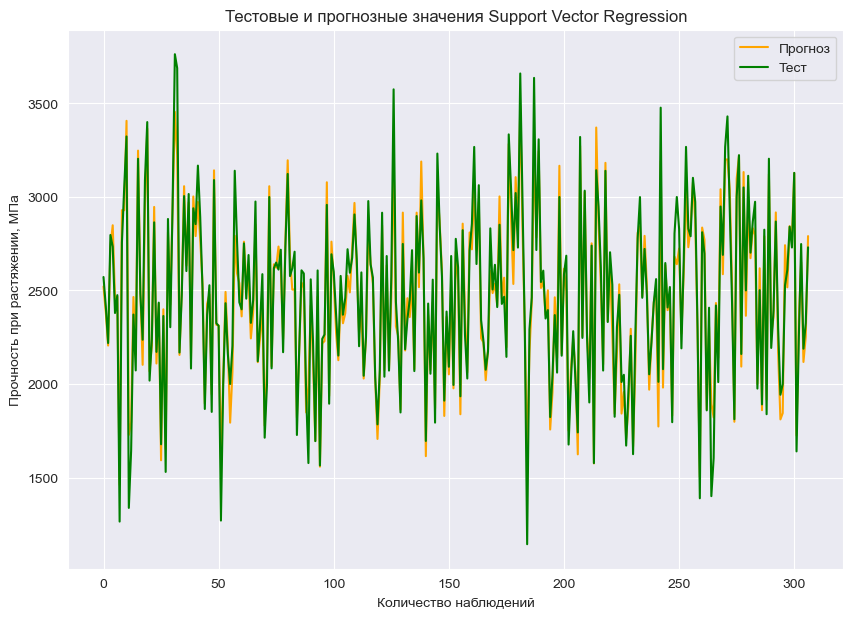

In [84]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Support Vector Regression")
plt.plot(y_pred_svr, label = "Прогноз", color = "orange")
plt.plot(y_test_1.values, label = "Тест", color = "green")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [85]:
# Метод случайного леса - Random Forest Regressor 

In [86]:
#построение модели и вузуализация метода случайный лес
rfr = RandomForestRegressor(n_estimators=15,max_depth=7, random_state=33)
rfr.fit(x_train_1, y_train_1.values)
y_pred_forest = rfr.predict(x_test_1)
mae_rfr = mean_absolute_error(y_pred_forest, y_test_1)
mse_rfr_elast = mean_squared_error(y_test_1,y_pred_forest)
print('Random Forest Regressor Results Train:')
print("Test score: {:.2f}".format(rfr.score(x_train_1, y_train_1))) # Скор для тренировочной выборки
print('Random Forest Regressor Results:')
print('RF_MAE: ', round(mean_absolute_error(y_test_1, y_pred_forest)))
print('RF_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_forest)))
print('RF_MSE: {:.2f}'.format(mse_rfr_elast))
print("RF_RMSE: {:.2f}".format (np.sqrt(mse_rfr_elast)))
print("Test score: {:.2f}".format(rfr.score(x_test_1, y_test_1))) # Скор для тестовой выборки

Random Forest Regressor Results Train:
Test score: 0.98
Random Forest Regressor Results:
RF_MAE:  82
RF_MAPE: 0.03
RF_MSE: 11001.48
RF_RMSE: 104.89
Test score: 0.95


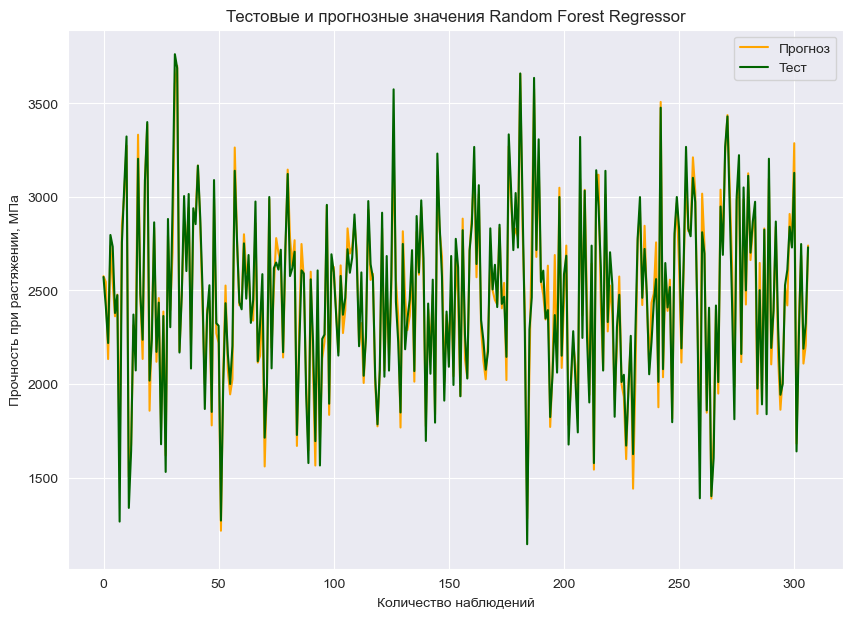

In [87]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y_pred_forest, label = "Прогноз", color = "orange")
plt.plot(y_test_1.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

# Метод линейной регрессии - Linear Regression - 3

In [88]:
#построение модели и вузуализация Линейной регрессии
lr = LinearRegression()
lr.fit(x_train_1, y_train_1)
y_pred_lr = lr.predict(x_test_1)
mae_lr = mean_absolute_error(y_pred_lr, y_test_1)
mse_lin_elast = mean_squared_error(y_test_1, y_pred_lr)
print('Linear Regression Results Train:') # Скор для тренировочной выборки
print("Test score: {:.2f}".format(lr.score(x_train_1, y_train_1)))
print('Linear Regression Results:')    
print('lr_MAE: ', round(mean_absolute_error(y_test_1, y_pred_lr)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_lr)))
print('lr_MSE: {:.2f}'.format(mse_lin_elast))
print("lr_RMSE: {:.2f}".format (np.sqrt(mse_lin_elast)))
print("Test score: {:.2f}".format(lr.score(x_test_1, y_test_1))) # Скор для тестовой выборки

Linear Regression Results Train:
Test score: 0.97
Linear Regression Results:
lr_MAE:  68
lr_MAPE: 0.03
lr_MSE: 7517.61
lr_RMSE: 86.70
Test score: 0.97


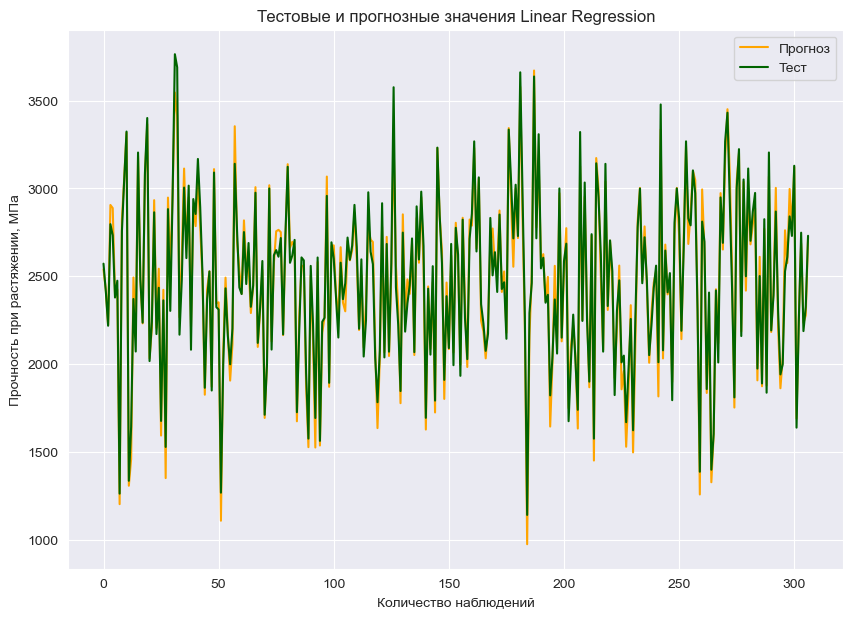

In [89]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Linear Regression")
plt.plot(y_pred_lr, label="Прогноз", color = 'orange')
plt.plot(y_test_1.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

#Линейная регрессия с задачей справилась в 97 % случаев.

# Визуализация гистограммы распределения ошибки

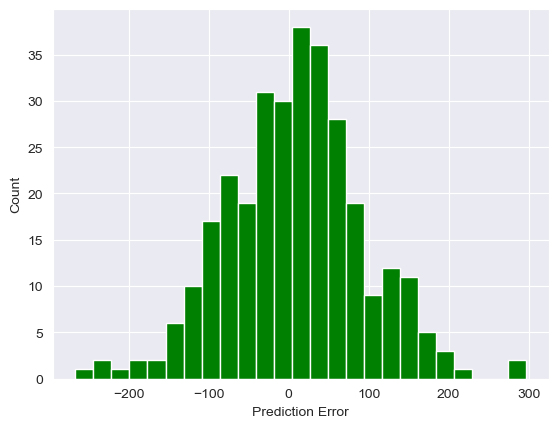

In [90]:
error = y_test_1 - y_pred_lr
plt.hist(error, bins = 25, color = "g")
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [91]:
#Метода градиентного бустинга - Gradient Boosting Regressor - 4 

In [92]:
gbr = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr.fit(x_train_1, np.ravel(y_train_1))
y_pred_gbr = gbr.predict(x_test_1)
mae_gbr = mean_absolute_error(y_pred_gbr, y_test_1)
mse_gbr_elast = mean_squared_error(y_test_1,y_pred_gbr)
print('Gradient Boosting Regressor Results Train:')
print("Test score: {:.2f}".format(gbr.score(x_train_1, y_train_1))) # Скор для тренировочной выборки
print('Gradient Boosting Regressor Results:')
print('GBR_MAE: ', round(mean_absolute_error(y_test_1, y_pred_gbr)))
print('GBR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_gbr)))
print('GBR_MSE: {:.2f}'.format(mse_gbr_elast))
print("GBR_RMSE: {:.2f}".format (np.sqrt(mse_gbr_elast)))
print("Test score: {:.2f}".format(gbr.score(x_test_1, y_test_1)))# Скор для тестовой выборки

Gradient Boosting Regressor Results Train:
Test score: 0.99
Gradient Boosting Regressor Results:
GBR_MAE:  62
GBR_MAPE: 0.03
GBR_MSE: 6467.45
GBR_RMSE: 80.42
Test score: 0.97


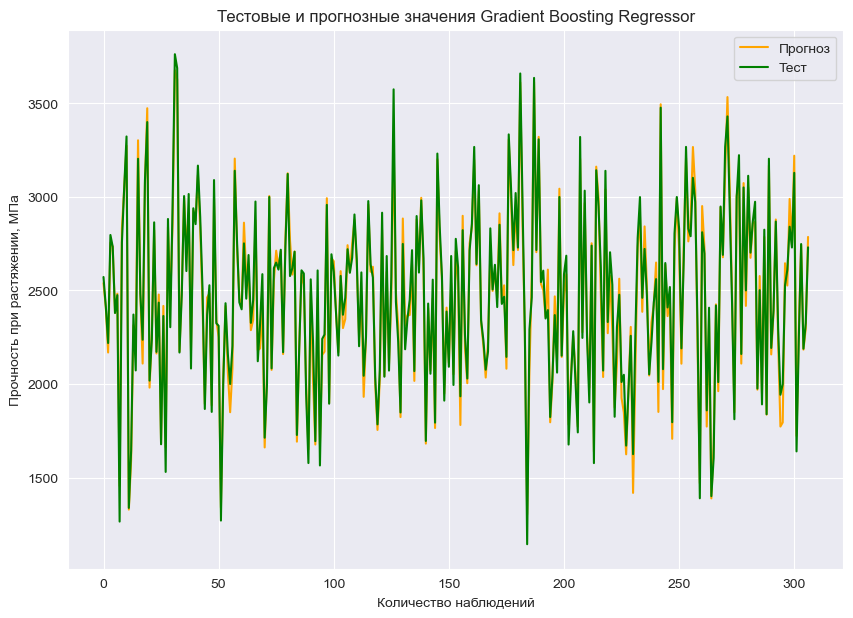

In [93]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Gradient Boosting Regressor")
plt.plot(y_pred_gbr, label = "Прогноз", color = "orange")
plt.plot(y_test_1.values, label = "Тест", color = "green")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);
#Градиентный бустинг с задачей справился в 97 % случаев.

In [94]:
# Метод К ближайших соседей - K Neighbors Regressor - 5
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_1, y_train_1)
y_pred_knn = knn.predict(x_test_1)
mae_knr = mean_absolute_error(y_pred_knn, y_test_1)
mse_knn_elast = mean_squared_error(y_test_1,y_pred_knn)
print('K Neighbors Regressor  Results Train:')
print("Test score: {:.2f}".format(knn.score(x_train_1, y_train_1)))# Скор для тренировочной выборки
print('K Neighbors Regressor  Results:')
print('KNN_MAE: ', round(mean_absolute_error(y_test_1, y_pred_knn)))
print('KNN_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_knn)))
print('KNN_MSE: {:.2f}'.format(mse_knn_elast))
print("KNN_RMSE: {:.2f}".format (np.sqrt(mse_knn_elast)))
print("Test score: {:.2f}".format(knn.score(x_test_1, y_test_1)))# Скор для тестовой выборки

K Neighbors Regressor  Results Train:
Test score: 0.93
K Neighbors Regressor  Results:
KNN_MAE:  127
KNN_MAPE: 0.05
KNN_MSE: 29287.16
KNN_RMSE: 171.13
Test score: 0.87


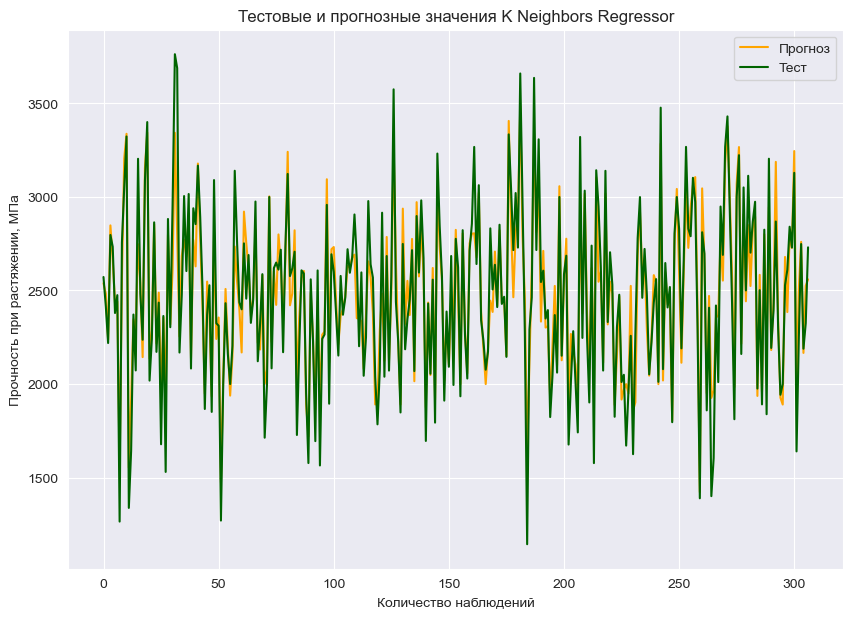

In [95]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения K Neighbors Regressor")
plt.plot(y_pred_knn, label = "Прогноз", color = 'orange')
plt.plot(y_test_1.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);


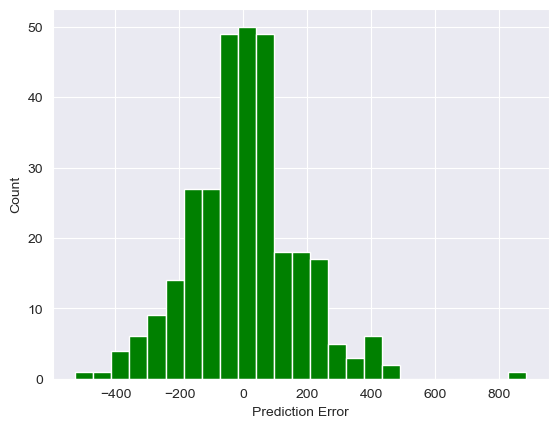

In [96]:
#Визуализация гистограммы распределения ошибки
error = y_test_1 - y_pred_knn
plt.hist(error, bins = 25, color = "g")
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [97]:
#Деревья решений - Decision Tree Regressor - 6

dtr = DecisionTreeRegressor()
dtr.fit(x_train_1, y_train_1.values)
y_pred_dtr = dtr.predict(x_test_1)
mae_dtr = mean_absolute_error(y_pred_dtr, y_test_1)
mse_dtr_elast = mean_squared_error(y_test_1,y_pred_dtr)
print('Decision Tree Regressor Results Train:')
print("Test score: {:.2f}".format(knn.score(x_train_1, y_train_1)))# Скор для тренировочной выборки
print('Decision Tree Regressor Results:')
print('DTR_MAE: ', round(mean_absolute_error(y_test_1, y_pred_dtr)))
print('DTR_MSE: {:.2f}'.format(mse_dtr_elast))
print("DTR_RMSE: {:.2f}".format (np.sqrt(mse_dtr_elast)))
print('DTR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_dtr)))
print("Test score: {:.2f}".format(dtr.score(x_test_1, y_test_1)))# Скор для тестовой выборки

Decision Tree Regressor Results Train:
Test score: 0.93
Decision Tree Regressor Results:
DTR_MAE:  109
DTR_MSE: 20138.78
DTR_RMSE: 141.91
DTR_MAPE: 0.05
Test score: 0.91


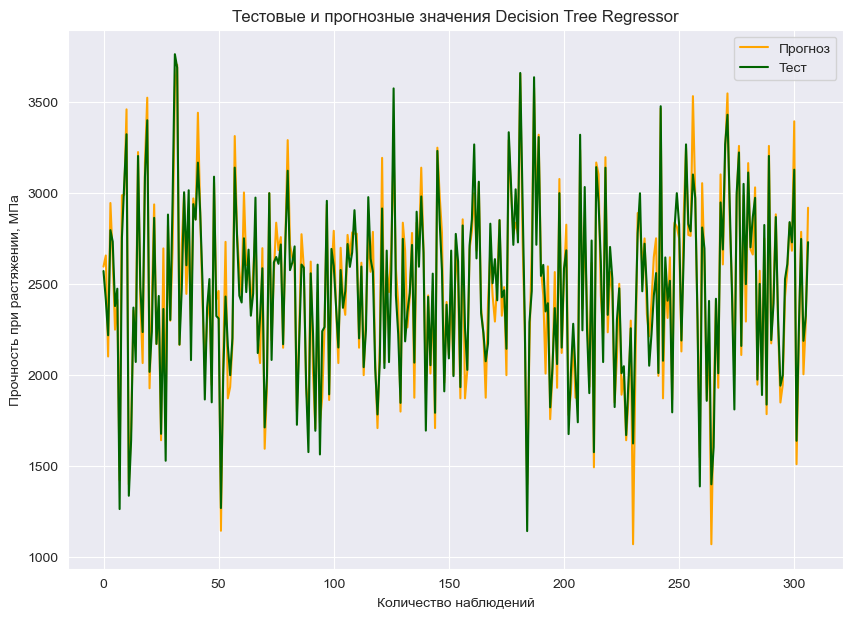

In [98]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Decision Tree Regressor")
plt.plot(y_pred_dtr, label = "Прогноз", color = 'orange')
plt.plot(y_test_1.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [99]:
# Стохастический градиентный спуск (SGD) - Stochastic Gradient Descent Regressor - 7 

sdg = SGDRegressor()
sdg.fit(x_train_1, y_train_1)
y_pred_sdg = sdg.predict(x_test_1)
mae_sdg = mean_absolute_error(y_pred_sdg, y_test_1)
mse_sdg_elast = mean_squared_error(y_test_1,y_pred_sdg)
print('Stochastic Gradient Descent Regressor Results Train:')
print("Test score: {:.2f}".format(sdg.score(x_train_1, y_train_1)))# Скор для тренировочной выборки
print('Stochastic Gradient Descent Regressor Results:')
print('SGD_MAE: ', round(mean_absolute_error(y_test_1, y_pred_sdg)))
print('SGD_MSE: {:.2f}'.format(mse_sdg_elast))
print("SGD_RMSE: {:.2f}".format (np.sqrt(mse_sdg_elast)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_sdg)))
print("Test score: {:.2f}".format(sdg.score(x_test_1, y_test_1)))# Скор для тестовой выборки

Stochastic Gradient Descent Regressor Results Train:
Test score: 0.81
Stochastic Gradient Descent Regressor Results:
SGD_MAE:  160
SGD_MSE: 40514.38
SGD_RMSE: 201.28
SGD_MAPE: 0.07
Test score: 0.82


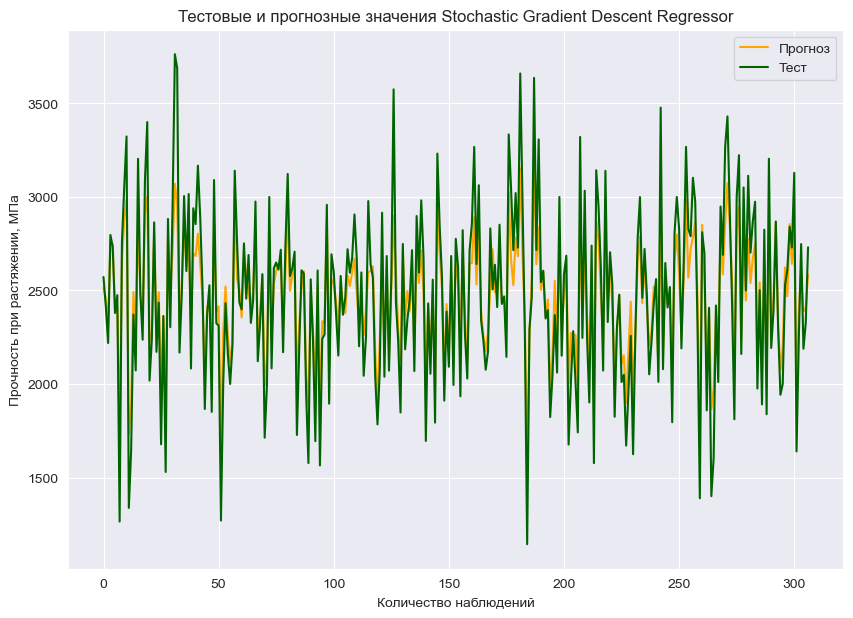

In [100]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Stochastic Gradient Descent Regressor")
plt.plot(y_pred_sdg, label = "Прогноз", color = 'orange')
plt.plot(y_test_1.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [101]:
# Многослойный перцептрон - Multi-layer Perceptron regressor - 8

mlp = MLPRegressor(random_state = 1, max_iter = 500)
mlp.fit(x_train_1, y_train_1)
y_pred_mlp = mlp.predict(x_test_1)
mae_mlp = mean_absolute_error(y_pred_mlp, y_test_1)
mse_mlp_elast = mean_squared_error(y_test_1,y_pred_mlp)
print('Multi-layer Perceptron regressor Results Train:')
print("Test score: {:.2f}".format(mlp.score(x_train_1, y_train_1)))# Скор для тренировочной выборки
print('Multi-layer Perceptron regressor Results:')
print('SGD_MAE: ', round(mean_absolute_error(y_test_1, y_pred_mlp)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_mlp)))
print('SGD_MSE: {:.2f}'.format(mse_mlp_elast))
print("SGD_RMSE: {:.2f}".format (np.sqrt(mse_mlp_elast)))
print("Test score: {:.2f}".format(mlp.score(x_test_1, y_test_1)))# Скор для тестовой выборки

Multi-layer Perceptron regressor Results Train:
Test score: -11.03
Multi-layer Perceptron regressor Results:
SGD_MAE:  1622
SGD_MAPE: 0.64
SGD_MSE: 2901929.52
SGD_RMSE: 1703.51
Test score: -11.96


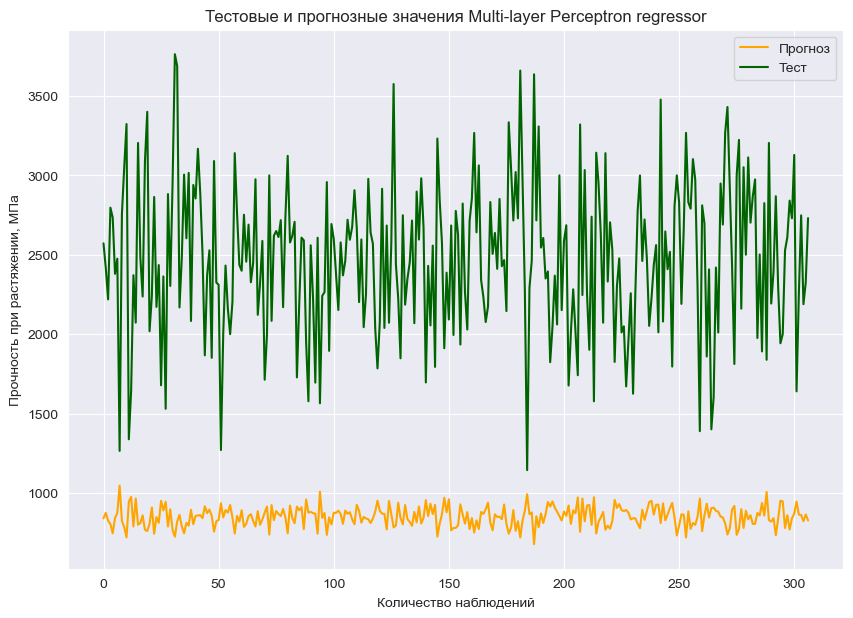

In [102]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Multi-layer Perceptron regressor")
plt.plot(y_pred_mlp, label = "Прогноз", color = 'orange')
plt.plot(y_test_1.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [103]:
# Лассо регрессия - the Lasso - 9

clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train_1, y_train_1)
y_pred_clf = clf.predict(x_test_1)
mae_clf = mean_absolute_error(y_pred_clf, y_test_1)
mse_clf_elast = mean_squared_error(y_test_1,y_pred_clf)
print('Lasso regressor Results Train:')
print("Test score: {:.2f}".format(clf.score(x_train_1, y_train_1)))# Скор для тренировочной выборки
print('Lasso regressor Results:')
print('SGD_MAE: ', round(mean_absolute_error(y_test_1, y_pred_clf)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_1, y_pred_clf)))
print('SGD_MSE: {:.2f}'.format(mse_clf_elast))
print("SGD_RMSE: {:.2f}".format (np.sqrt(mse_clf_elast)))
print("Test score: {:.2f}".format(clf.score(x_test_1, y_test_1)))# Скор для тестовой выборки

Lasso regressor Results Train:
Test score: 0.96
Lasso regressor Results:
SGD_MAE:  81
SGD_MAPE: 0.03
SGD_MSE: 11347.57
SGD_RMSE: 106.52
Test score: 0.95


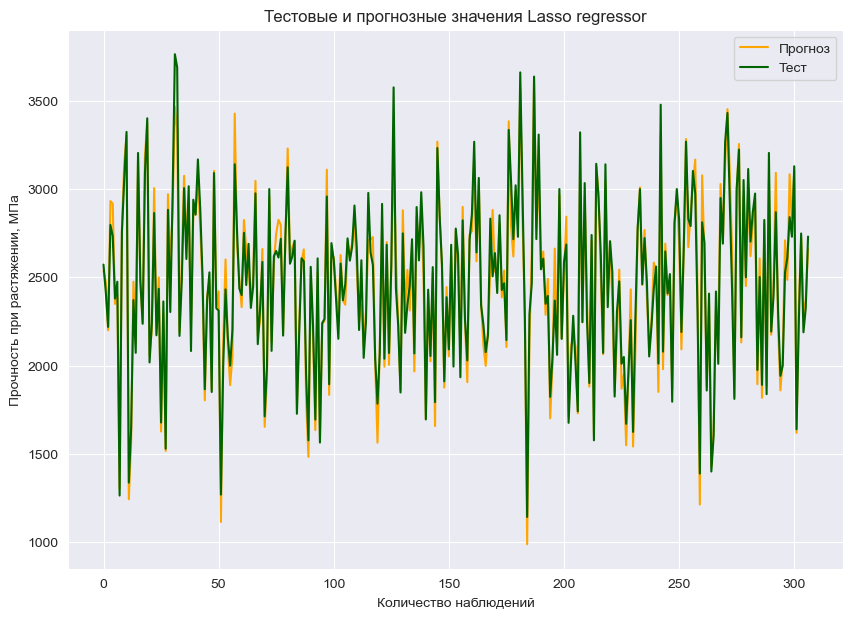

In [104]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Lasso regressor")
plt.plot(y_pred_clf, label = "Прогноз", color = 'orange')
plt.plot(y_test_1.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [105]:
#сравним наши модели по метрике МАЕ
mae_df = {'Регрессор': ['Support Vector', 'RandomForest', 'Linear Regression', 'GradientBoosting', 'KNeighbors', 'DecisionTree', 'SGD', 'MLP', 'Lasso'], 'MAE': [mae_svr, mae_rfr, mae_lr, mae_gbr, mae_knr, mae_dtr, mae_sdg, mae_mlp, mae_clf]} 

mae_df = pd.DataFrame(mae_df)

In [106]:
mae_df

,Регрессор,MAE
0,Support Vector,88.327116
1,RandomForest,81.985355
2,Linear Regression,67.768278
3,GradientBoosting,62.383360
4,KNeighbors,127.199769
5,DecisionTree,109.005819
6,SGD,159.743843
7,MLP,1621.640128
8,Lasso,81.149604


In [107]:
# Поиск оптимальных гиперпараметров.
# В машинном обучении гиперпараметрами называют параметры алгоритмов, значения которых устанавливаются перед запуском процесса обучения. 
# В этом смысле они и отличаются от обычных параметров, вычисляемых в процессе обучения. Гиперпараметры используются для управления процессом обучения.
#Один из способов настройки гиперпараметров состоит в том, чтобы заставить компьютер попробовать все возможные комбинации значений параметров. 
#Для этого используем модуль GridSearchCV из библиотеки Scikit Learn. Попытаемся найти наилучшую комбинацию гиперпараметров для построения классификатора для нашего набора данных.
#Метод GridSearch:
#ПЛЮСЫ: Этот метод получит требуемые оптимальные гиперпараметры.
#МИНУСЫ: Операция является исчерпывающей. Если диапазон или число гиперпараметров велики, то вероятности могут исчисляться миллионами, и на завершение потребуется довольно много времени.

In [108]:
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
# модели случайного леса - Random Forest Regressor - 2

parametrs = { 'n_estimators': [200, 300],
              'max_depth': [9, 15],
              'max_features': ['auto'],
              'criterion': ['mse'] }
grid = GridSearchCV(estimator = rfr, param_grid = parametrs, cv = 10)
grid.fit(x_train_1, y_train_1)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=7, n_estimators=15,
                                             random_state=33),
             param_grid={'criterion': ['mse'], 'max_depth': [9, 15],
                         'max_features': ['auto'], 'n_estimators': [200, 300]})

In [110]:
grid.best_params_

{'criterion': 'mse',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 300}

In [111]:
#Выводим гиперпараметры для оптимальной модели
print(grid.best_estimator_)
knr_upr = grid.best_estimator_
print(f'R2-score RFR для прочности при растяжении, МПа: {knr_upr.score(x_test_1, y_test_1).round(3)}')

RandomForestRegressor(criterion='mse', max_depth=15, n_estimators=300,
                      random_state=33)
R2-score RFR для прочности при растяжении, МПа: 0.96


In [112]:
#подставим оптимальные гиперпараметры в нашу модель случайного леса
rfr_grid = RandomForestRegressor(n_estimators = 200, criterion = 'mse', max_depth = 15, max_features = 'auto')
#Обучаем модель
rfr_grid.fit(x_train_1, y_train_1)

predictions_rfr_grid = rfr_grid.predict(x_test_1)
#Оцениваем точность на тестовом наборе
mae_rfr_grid = mean_absolute_error(predictions_rfr_grid, y_test_1)
mae_rfr_grid

73.48455202110858

In [113]:
new_row_in_mae_df = {'Регрессор': 'RandomForest_GridSearchCV', 'MAE': mae_rfr_grid} 

mae_df = mae_df.append(new_row_in_mae_df, ignore_index=True)

In [114]:
# поиск гипермараметров не дал улучшений для уже имеющейся модели RandomForestRegressor
# вероятно, нужно указывать больше вариаций параметров при работе с GridSearchCV
mae_df

,Регрессор,MAE
0,Support Vector,88.327116
1,RandomForest,81.985355
2,Linear Regression,67.768278
3,GradientBoosting,62.383360
4,KNeighbors,127.199769
5,DecisionTree,109.005819
6,SGD,159.743843
7,MLP,1621.640128
8,Lasso,81.149604
9,RandomForest_GridSearchCV,73.484552


In [115]:
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
# Метода К ближайших соседей - K Neighbors Regressor - 5
knn = KNeighborsRegressor()
knn_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
# Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.
gs = GridSearchCV(knn, knn_params, cv = 10, verbose = 1, n_jobs =-1, scoring = 'r2')
gs.fit(x_train_1, y_train_1)
knn_3 = gs.best_estimator_
gs.best_params_

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}

In [116]:
#Выводим гиперпараметры для оптимальной модели
print(gs.best_estimator_)
gs1 = gs.best_estimator_
print(f'R2-score KNR для прочности при растяжении, МПа: {gs1.score(x_test_1, y_test_1).round(3)}')

KNeighborsRegressor(n_neighbors=7, weights='distance')
R2-score KNR для прочности при растяжении, МПа: 0.879


In [117]:
#подставим оптимальные гиперпараметры в нашу модель метода к ближайших соседей
knn_grid = KNeighborsRegressor(algorithm = 'brute', n_neighbors = 7, weights = 'distance')
#Обучаем модель
knn_grid.fit(x_train_1, y_train_1)

predictions_knn_grid = knn_grid.predict(x_test_1)
#Оцениваем точность на тестовом наборе
mae_knn_grid = mean_absolute_error(predictions_knn_grid, y_test_1)
mae_knn_grid

122.43356037381564

In [118]:
new_row_in_mae_df = {'Регрессор': 'KNeighbors_GridSearchCV', 'MAE': mae_knn_grid} 

mae_df = mae_df.append(new_row_in_mae_df, ignore_index=True)
mae_df

,Регрессор,MAE
0,Support Vector,88.327116
1,RandomForest,81.985355
2,Linear Regression,67.768278
3,GradientBoosting,62.383360
4,KNeighbors,127.199769
5,DecisionTree,109.005819
6,SGD,159.743843
7,MLP,1621.640128
8,Lasso,81.149604
9,RandomForest_GridSearchCV,73.484552


In [119]:
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
#Деревья решений - Decision Tree Regressor - 6
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter = ['best', 'random']
max_depth = [3,5,7,9,11]
min_samples_leaf = [100,150,200]
min_samples_split = [200,250,300]
max_features = ['auto', 'sqrt', 'log2']
param_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
# Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.
gs4 = GridSearchCV(dtr, param_grid, cv = 10, verbose = 1, n_jobs =-1, scoring = 'r2')
gs4.fit(x_train_1, y_train_1)
dtr_3 = gs4.best_estimator_
gs.best_params_

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}

In [120]:
#Выводим гиперпараметры для оптимальной модели
print(gs4.best_estimator_)
gs1 = gs4.best_estimator_
print(f'R2-score DTR для прочности при растяжении, МПа: {gs4.score(x_test_1, y_test_1).round(3)}')

DecisionTreeRegressor(criterion='poisson', max_depth=7, max_features='auto',
                      min_samples_leaf=100, min_samples_split=200)
R2-score DTR для прочности при растяжении, МПа: 0.823


In [121]:
#подставим оптимальные гиперпараметры в нашу модель метода деревья решений
dtr_grid = DecisionTreeRegressor(criterion = 'poisson', max_depth = 7, max_features = 'auto',
                      min_samples_leaf = 100, min_samples_split = 250)
#Обучаем модель
dtr_grid.fit(x_train_1, y_train_1)

predictions_dtr_grid = dtr_grid.predict(x_test_1)
#Оцениваем точность на тестовом наборе
mae_dtr_grid = mean_absolute_error(predictions_dtr_grid, y_test_1)
mae_dtr_grid

174.27519401791506

In [122]:
new_row_in_mae_df = {'Регрессор': 'DecisionTree_GridSearchCV', 'MAE': mae_dtr_grid} 

mae_df = mae_df.append(new_row_in_mae_df, ignore_index = True)
mae_df

,Регрессор,MAE
0,Support Vector,88.327116
1,RandomForest,81.985355
2,Linear Regression,67.768278
3,GradientBoosting,62.383360
4,KNeighbors,127.199769
5,DecisionTree,109.005819
6,SGD,159.743843
7,MLP,1621.640128
8,Lasso,81.149604
9,RandomForest_GridSearchCV,73.484552


In [123]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('regressor', SVR())])
param_grid = [
{'regressor': [SVR()], 'preprocessing': [StandardScaler(), MinMaxScaler(), None],
'regressor__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
'regressor__C': [0.001, 0.01, 0.1, 1, 10, 100]},
{'regressor': [RandomForestRegressor(n_estimators = 100)],
'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [LinearRegression()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [GradientBoostingRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [KNeighborsRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [DecisionTreeRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [SGDRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [MLPRegressor(random_state = 1, max_iter = 500)], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [linear_model.Lasso(alpha = 0.1)], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},]
grid = GridSearchCV(pipe, param_grid, cv = 10)
grid.fit(x_train_1, np.ravel(y_train_1))
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Наилучшее значение правильности перекрестной проверки: {:.2f}".format(grid.best_score_))
print("Правильность на тестовом наборе: {:.2f}".format(grid.score(x_test_1, y_test_1)))

Наилучшие параметры:
{'preprocessing': None, 'regressor': GradientBoostingRegressor()}

Наилучшее значение правильности перекрестной проверки: 0.97
Правильность на тестовом наборе: 0.97


In [125]:
print("Наилучшая модель:\n{}".format(grid.best_estimator_))

Наилучшая модель:
Pipeline(steps=[('preprocessing', None),
                ('regressor', GradientBoostingRegressor())])
